
<font size = 4 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 3 >In this Exercise your goal is to make a good solution for the active competition on kaggle: https://www.kaggle.com/c/nlp-getting-started/data

<font color = 'Orange' size = 3 > In order to download the Datasets you will need to join and accept the terms and conditions of the competition. </foont>

You need to report the parameters for the best three models into a table that will contain the model architecture and F1 score.
</font>

<font color = 'Orange' size = 4 > Structure of the Dataset </font>

<font color = 'Orange' size = 3>
The Dataset it's divided on two parts for training and testing. For the testing part you need to map the id's with the sample_submission.csv, where the target column is located.</li>
</font>

<font color = 'Orange' size = 4 >Instructions</font>
<ul>
<font color = 'Orange'>
Try to train different kinds of NN's structures

<li>Choose the number of layers your model will have</li>
<li>Add Embedding Layer for the text</li>
<li>Choose the types of layers your model will have: CNN, LSTM, GRU, RNN, Dense,...</li>
<li>Choose the number of neurons in each hidden layer</li>
<li>Choose activation function for each layer: relu, sigmoid, softmax, softsign, linear,... </li>
<li>Choose the loss function for compiling: mean_squared_error, mean_absolute_error, root_mean_squared_error,....</li>
<li>Choose the optimizer function for compiling: adam, adagrad, adamax, sgd,....</li>
<li>Choose the number of epochs and the batch size for the training part</li>
</ul>

</font>
<font color = 'Orange' size = 4 >
Report the parameters of the three best models in a table with the given columns:
</font>
<ul>
<font color = 'Orange'>
<li>Number of the model</li>
<li>Number of layers</li>
<li>Types of layers</li>
<li>Activation function for each layer</li>
<li>Number of epochs</li>
<li>Batch size</li>
<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>F1 score for the prediction of the test part (this is the metric for rating the models)</li>
</ul>
<font color = 'Orange' size = 4 >Transformers based models</font>

<font color = 'Orange' size = 3 > Create a model that will use some of the pretrained BERT, RoBERTa, XLNet, XLM ... models for Text Classification [Hugging Face](https://huggingface.co/transformers/quicktour.html). 

Report the following parameters for models based on Transformers</font>
<ul>
<font color='orange'>
<li> Pretrained model</li>

<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>F1 score for the prediction of the test part (this is the metric for rating the models)
</li>

</ul>
</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/V semestar/Voved vo nauka za podatoci/datasets/nlp_labs5/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/V semestar/Voved vo nauka za podatoci/datasets/nlp_labs5/test.csv")
sample_df = pd.read_csv("/content/drive/MyDrive/V semestar/Voved vo nauka za podatoci/datasets/nlp_labs5/sample_submission.csv")

In [ ]:
sample_df.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


#Cleansing the dataset, inspired by other competitors, even though we're not doing that in the exercises


In [ ]:
import string
string.punctuation #gives all the puncs characters


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
  translator = str.maketrans("", "", string.punctuation)
  return text.translate(translator)

In [ ]:
train_df["text"] = train_df.text.map(remove_punct) 


In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1


Stop words are words that are so common they are basically ignored by typical tokenizers. There's a library in Python to remove these words, to improve the models

In [ ]:

# remove stopwords
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords


In [ ]:
stop = set(stopwords.words("english"))

def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

In [ ]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
train_df["text"] = train_df.text.map(remove_stopwords)


In [ ]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearb...,1
7609,10870,NaN,NaN,ariaahrary thetawniest control wild fires cali...,1
7610,10871,NaN,NaN,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj,1
7611,10872,NaN,NaN,police investigating ebike collided car little...,1


In [ ]:
#Divide the dataset
from sklearn.model_selection import train_test_split
X_train = train_df.text
Y_train = train_df.target 


In [ ]:
X_train[0]

'deeds reason earthquake may allah forgive us'

In [ ]:
Y_train[564]

0

Preprocessing of the test set


In [ ]:
test_df["text"] = test_df.text.map(remove_punct) 
test_df["text"] = test_df.text.map(remove_stopwords)



In [ ]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,heard earthquake different cities stay safe ev...
2,3,NaN,NaN,forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills 28 china taiwan
...,...,...,...,...
3258,10861,NaN,NaN,earthquake safety los angeles ûò safety faste...
3259,10865,NaN,NaN,storm ri worse last hurricane cityamp3others h...
3260,10868,NaN,NaN,green line derailment chicago httptcoutbxlcbiuy
3261,10874,NaN,NaN,meg issues hazardous weather outlook hwo httpt...


In [ ]:
import numpy as np

In [ ]:
#train to numpy to handle it easier
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

In [ ]:
#test to numpy
X_test = test_df.text.to_numpy()

In [ ]:
X_test

array(['happened terrible car crash',
       'heard earthquake different cities stay safe everyone',
       'forest fire spot pond geese fleeing across street cannot save',
       ..., 'green line derailment chicago httptcoutbxlcbiuy',
       'meg issues hazardous weather outlook hwo httptco3x6rbqjhn3',
       'cityofcalgary activated municipal emergency plan yycstorm'],
      dtype=object)

Using Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
max_features = 15000 #Try to change this parameter and compare results.

In [ ]:
tokenizer = Tokenizer(num_words=max_features)


In [ ]:
tokenizer.fit_on_texts(X_train)

In [ ]:
len(tokenizer.word_index.values()) #number of diff words!

22564

In [ ]:
#Tokenize test and train sets
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train[0]

[4390, 716, 152, 54, 1454, 4391, 13]

In [ ]:
X_test[0]

[762, 1779, 52, 22]

In [ ]:
Y_train[0]

1

Trying to figure out good number for max words by visualization

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#Adding extra column with len of sequence
train_df['text_length'] = train_df['text'].apply(len) 

In [ ]:
train_df

,id,keyword,location,text,target,text_length
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1,44
1,4,NaN,NaN,forest fire near la ronge sask canada,1,37
2,5,NaN,NaN,residents asked shelter place notified officer...,1,88
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,59
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,55
...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearb...,1,71
7609,10870,NaN,NaN,ariaahrary thetawniest control wild fires cali...,1,87
7610,10871,NaN,NaN,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj,1,49
7611,10872,NaN,NaN,police investigating ebike collided car little...,1,113


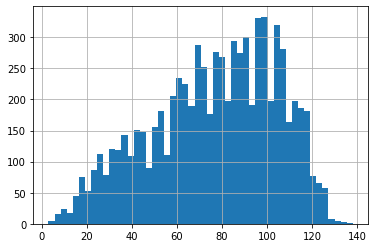

In [ ]:
train_df['text_length'].hist(bins=50)
 

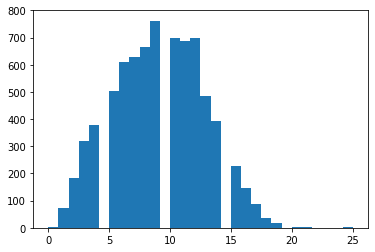

In [ ]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = 30)
plt.show()

In [ ]:
 from keras.preprocessing import sequence
max_words = 13
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
#print(X_train.shape,X_test.shape)

In [ ]:
print(X_train.shape, X_test.shape)

(7613, 13) (3263, 13)


Creating LSTM model


In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM, Flatten
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 13, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))    
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

In [ ]:

model = Sequential()
model.add(Embedding(max_features, 13, input_length=X_train.shape[1]))

model.add(LSTM(32, dropout=0.25))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 13, 13)            195000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                5888      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 200,921
Trainable params: 200,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 

In [ ]:
model_history = model.fit(X_train, Y_train,  epochs=10, batch_size=128, verbose=2, validation_split=0.2)
 

Epoch 1/10
48/48 - 3s - loss: 0.0000e+00 - accuracy: 0.5752 - val_loss: 0.0000e+00 - val_accuracy: 0.5345 - 3s/epoch - 70ms/step
Epoch 2/10
48/48 - 1s - loss: 0.0000e+00 - accuracy: 0.5793 - val_loss: 0.0000e+00 - val_accuracy: 0.5345 - 589ms/epoch - 12ms/step
Epoch 3/10
48/48 - 1s - loss: 0.0000e+00 - accuracy: 0.5793 - val_loss: 0.0000e+00 - val_accuracy: 0.5345 - 569ms/epoch - 12ms/step
Epoch 4/10
48/48 - 1s - loss: 0.0000e+00 - accuracy: 0.5793 - val_loss: 0.0000e+00 - val_accuracy: 0.5345 - 570ms/epoch - 12ms/step
Epoch 5/10
48/48 - 1s - loss: 0.0000e+00 - accuracy: 0.5793 - val_loss: 0.0000e+00 - val_accuracy: 0.5345 - 580ms/epoch - 12ms/step
Epoch 6/10
48/48 - 1s - loss: 0.0000e+00 - accuracy: 0.5793 - val_loss: 0.0000e+00 - val_accuracy: 0.5345 - 579ms/epoch - 12ms/step
Epoch 7/10
48/48 - 1s - loss: 0.0000e+00 - accuracy: 0.5793 - val_loss: 0.0000e+00 - val_accuracy: 0.5345 - 596ms/epoch - 12ms/step
Epoch 8/10
48/48 - 1s - loss: 0.0000e+00 - accuracy: 0.5793 - val_loss: 0.0000e

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_pred = y_pred.round()

In [ ]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
X_test

array([[   0,    0,    0, ..., 1779,   52,   22],
       [   0,    0,    0, ...,  497, 1867,  138],
       [   0,    0,    0, ...,  601, 1251,  233],
       ...,
       [   0,    0,    0, ...,  591,  237, 1146],
       [   0,    0,    0, ...,  148, 1577, 1752],
       [   0,    0,    0, ...,   15,  163, 6081]], dtype=int32)